In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is This PC
 Volume Serial Number is E408-B7AE

 Directory of C:\Users\91807\Desktop\Excelr\ASSIGNMENT\KNN

30-12-2022  16:16    <DIR>          .
12-11-2022  13:03    <DIR>          ..
08-12-2022  22:27    <DIR>          .ipynb_checkpoints
12-11-2022  13:03            10,053 glass.csv
30-12-2022  16:16           109,772 glass_KNN.ipynb
12-11-2022  13:03               550 problem_statement(Glass).txt
12-11-2022  13:03                62 Problem_Statement(Zoo).txt
12-11-2022  13:03             4,600 Zoo.csv
10-12-2022  17:30            51,726 zoo_KNN.ipynb
               6 File(s)        176,763 bytes
               3 Dir(s)  164,239,593,472 bytes free


In [3]:
zoo=pd.read_csv("Zoo.csv")

In [4]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [8]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

Text(0, 0.5, 'count')

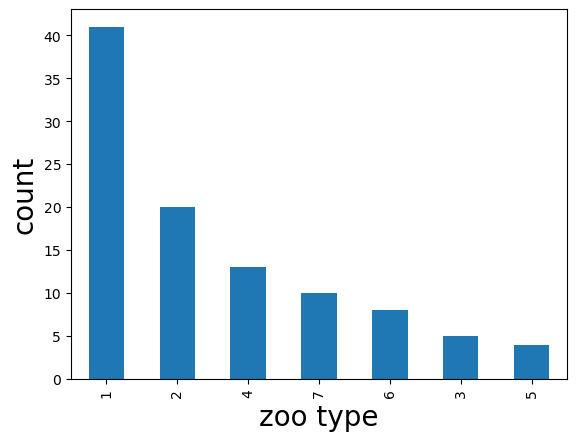

In [15]:
zoo["type"].value_counts().plot(kind='bar')
plt.xlabel("zoo type",size=20)
plt.ylabel("count",size=20)

In [16]:
X=zoo.iloc[:,1:-1]
Y=zoo.iloc[:,-1]

In [17]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=19)


In [19]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)


0.8709677419354839

In [20]:
cm=confusion_matrix(y_test,pred)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

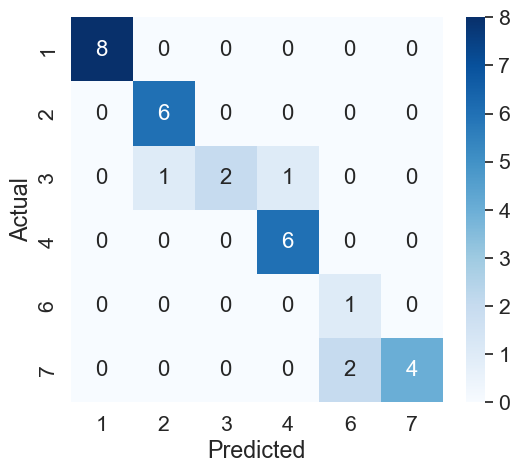

In [21]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.86      1.00      0.92         6
           3       1.00      0.50      0.67         4
           4       0.86      1.00      0.92         6
           6       0.33      1.00      0.50         1
           7       1.00      0.67      0.80         6

    accuracy                           0.87        31
   macro avg       0.84      0.86      0.80        31
weighted avg       0.92      0.87      0.87        31



# Visualizing the CV results

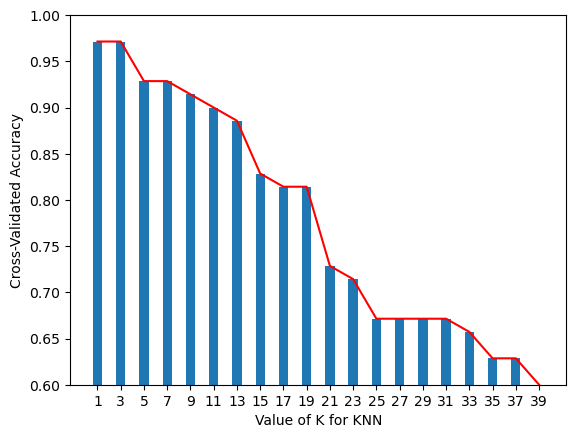

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range=[2*i+1 for i in range(0,20)]
k_scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()

In [13]:
np.argmax(k_scores)

0

In [14]:
k_range[0]

1